### Let's design a small data flow 

设计一个python class 包含一下可执行的function

1. 收集至少三只股票过去一年内每天的开市和闭市价格
2. 将返回数据按照date 和股票名称拆分并保存成csv，以股票和date作为csv的文件名: CTC_20200704.csv
3. 需要将csv放在以相应日期为路径的文件夹中： ./csv/2020/07/24/
4. 加入一个计时器来计算获取数据所需要的时间

In [56]:
# python 2:  import pandas.io.data as pd
# python 3:  
# check your env in jupyter: !which python
# pip install pandas-datareader
# More detail: https://pydata.github.io/pandas-datareader/
from pandas_datareader import data as wb
import datetime

In [57]:
%matplotlib inline

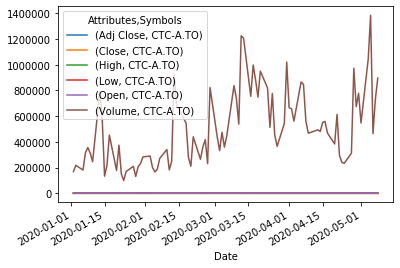

In [73]:
prices = wb.get_data_yahoo(['CTC-A.TO'], start = datetime(2020, 1, 1),
                          end = datetime(2020,5,8))
prices.plot()

In [74]:
prices[['Adj Close', 'Open']]

Attributes   Adj Close        Open
Symbols       CTC-A.TO    CTC-A.TO
Date                              
2020-01-02  135.818710  139.820007
2020-01-03  135.721497  138.669998
2020-01-06  135.915894  139.399994
2020-01-07  138.170776  140.000000
2020-01-08  138.073593  142.160004
...                ...         ...
2020-05-04   92.727982   93.199997
2020-05-05   90.389725   95.120003
2020-05-06   92.034431   91.910004
2020-05-07   91.836281   94.050003
2020-05-08   99.168114   94.389999

[90 rows x 2 columns]

In [62]:
from pandas_datareader import data as wb
from datetime import datetime, timedelta, date
import time
import os

In [67]:
class get_stock:

    def __init__(self, start_date, end_date, **kwargs):
        """

        :param kwargs: values for stock name
        """
        self.start_date = self.date_transfer(start_date)
        self.end_date = self.date_transfer(end_date)
        self.stock_dict = kwargs
        self.stock_names = list(self.stock_dict.values())
        print(type(self.start_date))
        print(self.end_date)
        print(self.stock_dict)
        print(self.stock_names)

        self.current_dir = os.getcwd()
        print("The current working directory is %s" % self.current_dir)

    def date_transfer(self, date_str):
        """
        date format
        :return:
        """
        format_str = "%Y-%m-%d"
        date_datetime = datetime.strptime(date_str, format_str)
        return date_datetime

In [68]:
start_date = "2020-01-01"
end_date = "2020-01-15"
run_class = get_stock(start_date,
                      end_date,
                      stock_1="CTC-A.TO",
                      stock_2="SHOP",
                      stock_3="AAPL")



<class 'datetime.datetime'>
2020-01-15 00:00:00
{'stock_1': 'CTC-A.TO', 'stock_2': 'SHOP', 'stock_3': 'AAPL'}
['CTC-A.TO', 'SHOP', 'AAPL']
The current working directory is /Users/alston/Desktop/pycharm_project/alston_course_v1/notebooks_students/lecture_2


In [76]:
!which pip

/Users/alston/opt/anaconda3/bin/pip


In [ ]:
class get_stock:

    def __init__(self, start_date, end_date, **kwargs):
        """

        :param kwargs: values for stock name
        """
        self.start_date = self.date_transfer(start_date)
        self.end_date = self.date_transfer(end_date)
        self.stock_dict = kwargs
        self.stock_names = list(self.stock_dict.values())
        print(self.start_date)
        print(self.end_date)
        print(self.stock_names)

        self.current_dir = os.getcwd()
        print("The current working directory is %s" % self.current_dir)

    def date_transfer(self, date_str):
        """
        date format
        :return:
        """
        format_str = "%Y-%m-%d"
        date_datetime = datetime.strptime(date_str, format_str)
        return date_datetime

    def get_stock_price(self, stock_name):
        """
        Main function
        :return:
        """
        df_price = wb.get_data_yahoo([stock_name], start=self.start_date, end=self.end_date)
        return df_price[['Adj Close', 'Open']]

    def create_dir(self, directory):
        # # Method 1
        # try:
        #     os.mkdir(path)
        # except OSError:
        #     print("Creation of the directory %s failed" % path)
        # else:
        #     print("Successfully created the directory %s " % path)
        if not os.path.exists(directory):
            os.makedirs(directory)
        else:
            print(" Dir already exist: {}".format(directory))

    def save_tofiles(self, df_price, stock_name):
        desti_date_list = df_price.index.to_list()
        i = 0
        for desti_date in desti_date_list:
            # prepare path
            year, month, day = desti_date.isocalendar()
            path_name = self.current_dir + '/outputs/' + str(year) + '/' + str(month) + '/' + str(day)

            # split dataframe for daily use:
            df_daily = df_price.loc[df_price.index[i]].to_frame()

            # create new dir if not exist
            self.create_dir(path_name)

            # write to file:
            file_name = stock_name + '-' + str(year) + '-' + str(month) + '-' + str(day) + '.csv'
            destination_path = path_name + '/' + file_name
            print(destination_path)
            df_daily.to_csv(destination_path)

            # add 1 to iterable value:
            i += 1

    @deco_timer
    def trigger_func(self):

        for stock_name in self.stock_names:
            print("====> getting stock price for: {}".format(stock_name))
            df_price = self.get_stock_price(stock_name)
            print("====> Splitting the dataframe and write to each folders")
            self.save_tofiles(df_price, stock_name)

        print("$$$$$ Done $$$")


if __name__ == "__main__":
    start_date = "2020-01-01"
    end_date = "2020-01-15"
    run_class = get_stock(start_date,
                          end_date,
                          stock_1="CTC-A.TO",
                          stock_2="SHOP",
                          stock_3="AAPL")

    run_class.trigger_func()

